<a href="https://colab.research.google.com/github/LeconteEsteban/Sae_3A/blob/main/PythonCollaboratif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRY IT


In [ ]:
#coucou les loulous, utiliser ce fichier pour nettoyage de donnée et analyse ;)
!pip install umap-learn
!pip install mca
!pip install adjustText

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6009 sha256=e594bfab22a3dc350f57bc8ecfb1c3d45b7fd6b3373b74fc8a0f6f72a02e30cc
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
import requests
from io import StringIO

In [ ]:
# URL of Google Sheets about books
url = 'https://docs.google.com/spreadsheets/d/1cWkVcuw_wTQxqTgJcRfCZTweSb06tzfHVbuAd73owNw/export?format=csv&gid=1613894920'

# download the CSV file
response = requests.get(url)

# Check if it succed
if response.status_code == 200:
     # Convert the content to a string and use StringIO to handle it as a file-like object
    csv_data = StringIO(response.content.decode('utf-8'))

    # Read the CSV into a DataFrame with low_memory=False to avoid mixed dtype warnings and range for the number of columns to import
    df = pd.read_csv(csv_data, low_memory=False)
    df = df[df.columns[:25]]
else:
    print(f"ERROR WHILE DOWNLOADING THE FILE: {response.status_code}")


In [ ]:
#Import For the author sheet
url = 'https://docs.google.com/spreadsheets/d/1cWkVcuw_wTQxqTgJcRfCZTweSb06tzfHVbuAd73owNw/export?format=csv&gid=818727220'
response = requests.get(url)
if response.status_code == 200:
     # Convert the content to a string and use StringIO to handle it as a file-like object
    csv_data = StringIO(response.content.decode('utf-8'))

    # Read the CSV into a DataFrame with low_memory=False to avoid mixed dtype warnings and range for the number of columns to import
    df_author = pd.read_csv(csv_data, low_memory=False, usecols=range(18))

else:
    print(f"ERROR WHILE DOWNLOADING THE FILE: {response.status_code}")


In [ ]:
print(df.columns)

# Cleaning the data
df['year_published'] = pd.to_numeric(df['year_published'], errors='coerce')
df = d.dropna(subset=['year_published'])
df_cleaned['year_published'] = df_cleaned['year_published'].astype(int)

# Generate the range of valid years (include years with no ratings)
min_year = df['year_published'].min()
max_year = df['year_published'].max()
all_years = pd.DataFrame({'year_published': np.arange(min_year, max_year + 1)})

# Merge the data to include all missing years
dfcomplete = pd.merge(all_years, df_cleaned, on='year_published', how='left')

# Replace NaN values (for ratings) with 0 for calculation or NaN if you want to exclude them from averages
df_complete[['one_star_ratings', 'two_star_ratings', 'three_star_ratings', 'four_star_ratings', 'five_star_ratings']] = \
    df_complete[['one_star_ratings', 'two_star_ratings', 'three_star_ratings', 'four_star_ratings', 'five_star_ratings']].fillna(0)

# Divide the years into quartile classes including all years (even those without ratings)
year_bins = 4
df_complete['year_published_class'] = pd.qcut(df_complete['year_published'], q=year_bins, duplicates='drop')

# Group by year classes and calculate the average ratings for all years, even if some are 0
y1 = df_complete.groupby('year_published_class')['one_star_ratings'].mean()
y2 = df_complete.groupby('year_published_class')['two_star_ratings'].mean()
y3 = df_complete.groupby('year_published_class')['three_star_ratings'].mean()
y4 = df_complete.groupby('year_published_class')['four_star_ratings'].mean()
y5 = df_complete.groupby('year_published_class')['five_star_ratings'].mean()

# Creating the chart
x = np.arange(len(y1))
width = 0.15
dist = width

# Labels for year classes for xticks (all years)
xtick_labels = [f"{int(interval.left)} - {int(interval.right)}" for interval in df_complete['year_published_class'].cat.categories]

plt.bar(x - 2*dist, y1, width, color='#F28E2B', label="1★")  # Bright orange
plt.bar(x - dist, y2, width, color='#3D85C6', label="2★")   # Bright blue
plt.bar(x, y3, width, color='#A6D785', label="3★")          # Pastel green
plt.bar(x + dist, y4, width, color='#D94D25', label="4★")   # Bright red
plt.bar(x + 2*dist, y5, width, color='#6D3D99', label="5★") # Purple

plt.xticks(x, xtick_labels)
plt.xlabel("Year of Publication")
plt.ylabel("Rating")
plt.legend(["1★", "2★", "3★", "4★", "5★"])
plt.title("Bar Chart of Book Ratings by Year of Publication")
plt.tight_layout()
plt.show()

In [ ]:
print(df_author.columns)

Index(['author_average_rating', 'author_gender', 'author_genres', 'author_id',
       'author_name', 'author_rating_count', 'author_review_count',
       'birthplace', 'book_average_rating', 'book_id', 'book_title', 'genre_1',
       'genre_2', 'num_ratings', 'num_reviews', 'pages', 'publish_date',
       'year_published'],
      dtype='object')


In [ ]:
    # Afficher les premières lignes du DataFrame pour vérifier les données
    #print(df.head())
    print(df.columns)

Index(['id', 'title', 'series', 'author', 'rating_count', 'review_count',
       'average_rating', 'five_star_ratings', 'four_star_ratings',
       'three_star_ratings', 'two_star_ratings', 'one_star_ratings',
       'number_of_pages', 'year_published', 'date_published', 'publisher',
       'original_title', 'genre_and_votes', 'isbn', 'isbn13', 'settings',
       'characters', 'awards', 'books_in_series', 'description'],
      dtype='object')


In [ ]:
print(df['year_published'])

0        2007.0
1        2006.0
2        2009.0
3        1997.0
4        1995.0
          ...  
52194    2007.0
52195    2014.0
52196    1961.0
52197    2007.0
52198    2009.0
Name: year_published, Length: 52199, dtype: float64


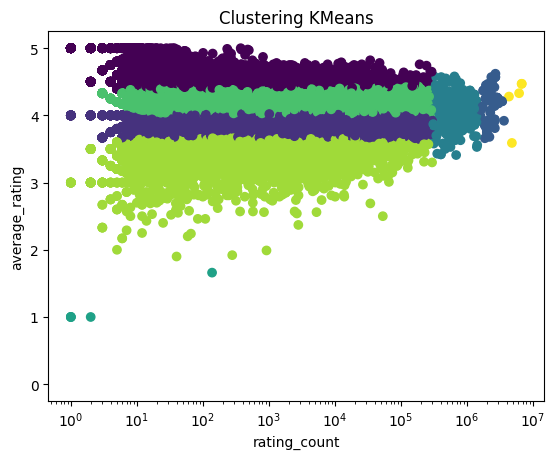

In [ ]:
# Sélectionner les colonnes pertinentes pour le clustering
features = df[['rating_count','average_rating']]

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Appliquer l'algorithme de clustering KMeans
kmeans = KMeans(n_clusters=8, random_state=42)  # Vous pouvez ajuster le nombre de clusters
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualiser les clusters (si les données sont en 2D)
if features.shape[1] == 2:
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df['cluster'], cmap='viridis')
    plt.xscale('log')
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])
    plt.title('Clustering KMeans')
    plt.show()

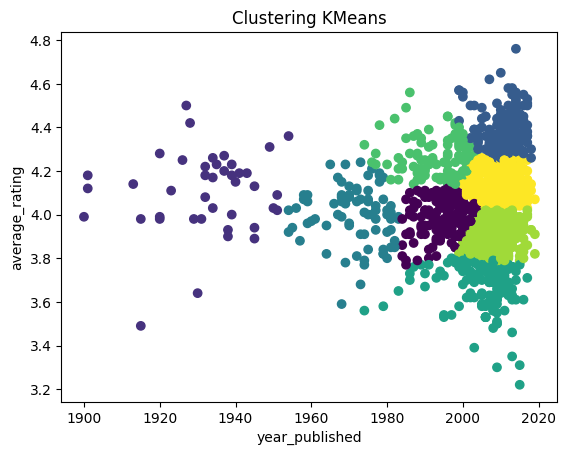

In [ ]:
df_clust = df.dropna()

# Retirer les lignes où 'year_published' est inférieur à 1500
df_clust = df_clust[df_clust['year_published'] >= 1900]

# Sélectionner les colonnes pertinentes pour le clustering
features = df_clust[['year_published','average_rating']]

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Appliquer l'algorithme de clustering KMeans
kmeans = KMeans(n_clusters=8, random_state=42)  # Vous pouvez ajuster le nombre de clusters
df_clust['cluster'] = kmeans.fit_predict(features_scaled)

# Visualiser les clusters (si les données sont en 2D)
if features.shape[1] == 2:
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df_clust['cluster'], cmap='viridis')
    #plt.xscale('log')
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])
    plt.title('Clustering KMeans')
    plt.show()


<Figure size 640x480 with 0 Axes>

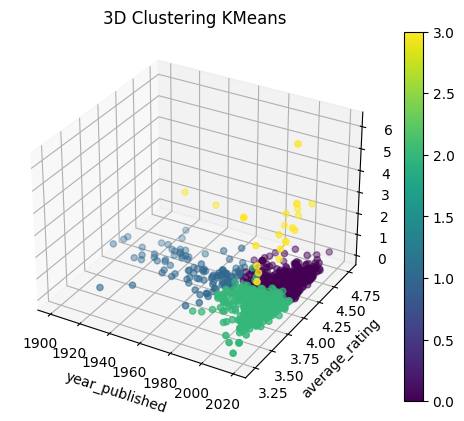

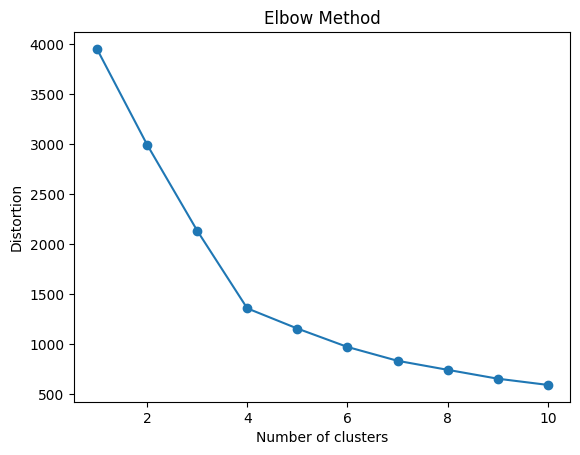

In [ ]:
df_clust = df.dropna()

# Retirer les lignes où 'year_published' est inférieur à 1500
df_clust = df_clust[df_clust['year_published'] >= 1900]

# Sélectionner les colonnes pertinentes pour le clustering
features = df_clust[['year_published','average_rating', 'rating_count']]

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Appliquer l'algorithme de clustering KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Vous pouvez ajuster le nombre de clusters
df_clust['cluster'] = kmeans.fit_predict(features_scaled)

# Visualiser les clusters (si les données sont en 2D)
if features.shape[1] == 2:
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df_clust['cluster'], cmap='viridis')
    #plt.xscale('log')
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])
    plt.title('Clustering KMeans')
    plt.show()

# Visualization (if 3D is needed for 3 features)
if features.shape[1] == 3:
    plt.clf()
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(features.iloc[:, 0], features.iloc[:, 1], features.iloc[:, 2],
                         c=df_clust['cluster'], cmap='viridis')

    # Add labels
    ax.set_xlabel(features.columns[0])
    ax.set_ylabel(features.columns[1])
    ax.set_zlabel(features.columns[2])
    plt.title('3D Clustering KMeans')
    plt.colorbar(scatter)
    plt.show()

#Pour déterrminer le nombre de cluster
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(features_scaled)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

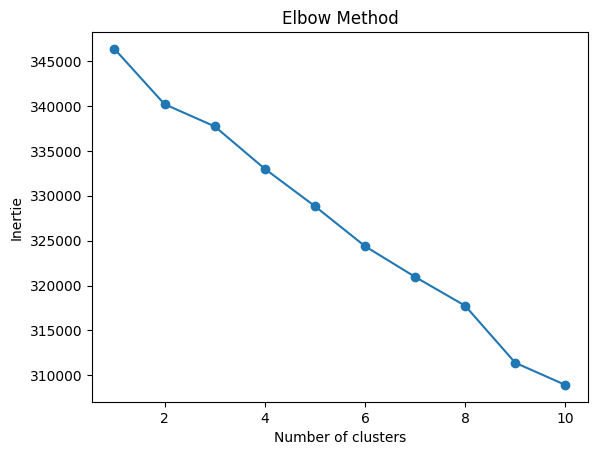

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import re

df_clust = df.dropna()
df_genre = df_clust[['genre_and_votes']].copy()

# Fonction pour transformer la colonne 'genre_and_votes' en un dictionnaire {genre: votes}
def parse_genre_votes(genre_and_votes):
    genre_votes = re.findall(r'([\w\s-]+)\s(\d+)', genre_and_votes)
    return {genre.strip(): int(vote) for genre, vote in genre_votes}

# Appliquer la fonction à la colonne 'genre_and_votes' pour obtenir une liste de dictionnaires
df_genre['genre_votes_dict'] = df_genre['genre_and_votes'].apply(parse_genre_votes)

# Obtenir la liste de tous les genres uniques
all_genres = set()
df_genre['genre_votes_dict'].apply(lambda x: all_genres.update(x.keys()))

# Créer un dictionnaire pour stocker les données des nouvelles colonnes
genre_data = {}
for genre in all_genres:
    genre_data[genre] = df_genre['genre_votes_dict'].apply(lambda x: x.get(genre, 0))

# Concaténer les nouvelles colonnes au DataFrame df_genre
df_genre = pd.concat([df_genre, pd.DataFrame(genre_data)], axis=1)

# Supprimer la colonne intermédiaire
df_genre = df_genre.drop(columns=['genre_votes_dict'])

# Sélectionner les colonnes de genres pour le clustering
genre_columns = list(all_genres)
genre_features = df_genre[genre_columns]

# Standardiser les données
scaler = StandardScaler()
genre_features_scaled = scaler.fit_transform(genre_features)

# Appliquer l'algorithme de clustering KMeans
kmeans = KMeans(n_clusters=30, random_state=42, n_init=10)
df_genre['cluster'] = kmeans.fit_predict(genre_features_scaled)

#Pour déterrminer le nombre de cluster
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(genre_features_scaled)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertie')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Créer un tableau de comptage des genres
genre_counts = df_genre[genre_columns].sum().reset_index()
genre_counts.columns = ['genre', 'count']

In [ ]:
import matplotlib.pyplot as plt
import umap
from collections import Counter

# Créer un tableau de comptage des genres
genre_counts = df_genre[genre_columns].sum().reset_index()
genre_counts.columns = ['genre', 'count']
genre_counts = genre_counts[genre_counts['count'] > 0] # add this line to filter out counts that are zero

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


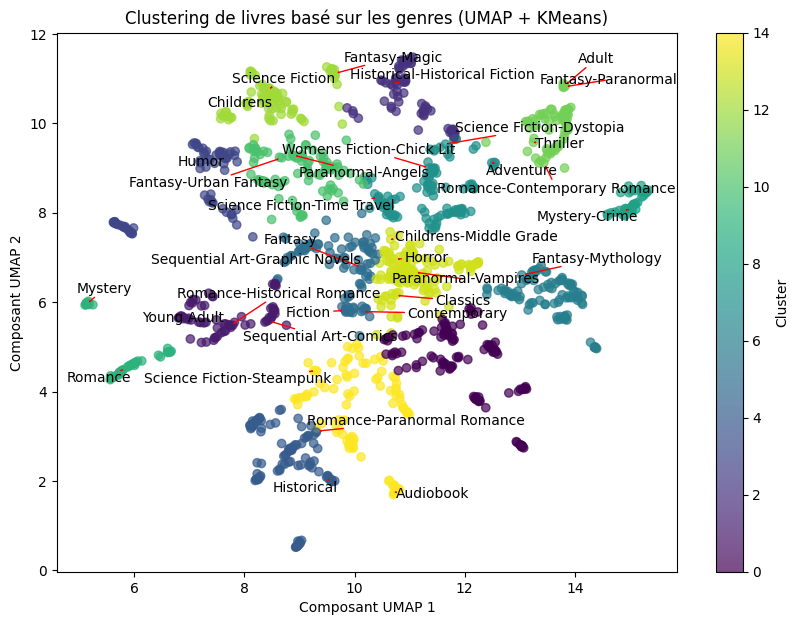

In [ ]:
excluded_genre = ''

# Définir un seuil pour les genres principaux
threshold = 10000
main_genres = [genre for genre, count in genre_counts.set_index('genre')['count'].items() if count >= threshold and genre != excluded_genre] # change this line to use the numeric count column

# Standardiser les données avant le clustering
scaler = StandardScaler()
genre_features_scaled = scaler.fit_transform(genre_features)

# Appliquer UMAP pour réduire les dimensions à 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
reduced_umap = umap_model.fit_transform(genre_features_scaled)

# Appliquer KMeans aux données UMAP réduites
kmeans_umap = KMeans(n_clusters=15, random_state=42, n_init=10)
df_genre['cluster_umap'] = kmeans_umap.fit_predict(reduced_umap)

# Visualiser les clusters avec UMAP
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_umap[:, 0], reduced_umap[:, 1], c=df_genre['cluster_umap'], cmap='viridis', alpha=0.7)
plt.xlabel('Composant UMAP 1')
plt.ylabel('Composant UMAP 2')
plt.title('Clustering de livres basé sur les genres (UMAP + KMeans)')
plt.colorbar(label='Cluster')

from adjustText import adjust_text

# Création d'une liste pour stocker les annotations
texts = []

# Boucle pour ajouter les étiquettes uniquement pour les genres principaux
for i, genre in enumerate(genre_columns):
    if genre in main_genres:
        # Si le genre en question est celui qui pose problème
        if genre == "Apocalyptic-Post Apocalyptic":
            # Ajouter l'annotation avec un décalage manuel
            texts.append(
                plt.annotate(
                    genre,
                    (reduced_umap[i, 0] + 0.01, reduced_umap[i, 1] + 0.05),  # Ajuster ici le décalage
                    fontsize=10,
                    ha='center',
                    va='center'
                )
            )
        else:
            # Ajouter les autres annotations normalement
            texts.append(
                plt.annotate(
                    genre,
                    (reduced_umap[i, 0], reduced_umap[i, 1]),
                    fontsize=10,
                    ha='center',
                    va='center'
                )
            )

# Ajustement des textes pour éviter les superpositions
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


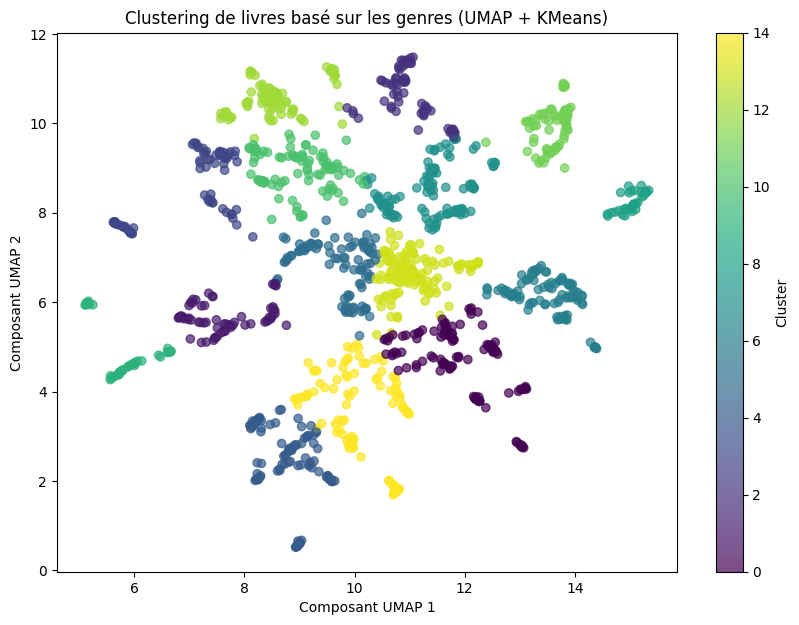

In [ ]:
# Standardiser les données avant le clustering
scaler = StandardScaler()
genre_features_scaled = scaler.fit_transform(genre_features)

# Appliquer UMAP pour réduire les dimensions à 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
reduced_umap = umap_model.fit_transform(genre_features_scaled)

# Appliquer KMeans aux données UMAP réduites
kmeans_umap = KMeans(n_clusters=15, random_state=42, n_init=10)
df_genre['cluster_umap'] = kmeans_umap.fit_predict(reduced_umap)

# Visualiser les clusters avec UMAP
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_umap[:, 0], reduced_umap[:, 1], c=df_genre['cluster_umap'], cmap='viridis', alpha=0.7)
plt.xlabel('Composant UMAP 1')
plt.ylabel('Composant UMAP 2')
plt.title('Clustering de livres basé sur les genres (UMAP + KMeans)')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.spatial import ConvexHull
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
from mca import MCA




quantitativesDataBook = df[["rating_count", "review_count", "average_rating", "five_star_ratings",
                         "four_star_ratings", "three_star_ratings", "two_star_ratings",
                         "one_star_ratings", "number_of_pages", "year_published"]]


# Suppression des valeurs manquantes
quantitativesDataBook = quantitativesDataBook.dropna()

# Standardisation des données
X = StandardScaler().fit_transform(quantitativesDataBook)



# PCA
pca = PCA(n_components=2)
pca.fit(X)
pca_res = pca.transform(X)

# Variance expliquée
y1 = list(pca.explained_variance_ratio_)
x1 = list(range(len(y1)))


# Fonction pour créer le biplot
def biplot(pca=[], x=None, y=None, components=[0, 1], score=None, coeff=None,
           coeff_labels=None, score_labels=None, circle='T', bigdata=1000, cat=None,
           cmap="viridis", density=True):

    if isinstance(pca, PCA):
        coeff = np.transpose(pca.components_[components, :])
        score = pca.fit_transform(x)[:, components]

        if isinstance(x, pd.DataFrame):
            coeff_labels = list(x.columns)

    if score is not None:
        x = score

    if x.shape[1] > 1:
        xs = x[:, 0]
        ys = x[:, 1]
    else:
        xs = x
        ys = y

    if len(xs) != len(ys):
        print("Warning ! x et y n'ont pas la même taille !")

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    temp = (xs - xs.min())
    x_c = temp / temp.max() * 2 - 1

    temp = (ys - ys.min())
    y_c = temp / temp.max() * 2 - 1

    data = pd.DataFrame({"x_c": x_c, "y_c": y_c})
    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")

    if cat is None:
        cat = [0] * len(xs)
    elif len(pd.Series(cat)) == 1:
        cat = list(pd.Series(cat)) * len(xs)
    elif len(pd.Series(cat)) != len(xs):
        print("Warning ! Nombre anormal de catégories !")

    cat = pd.Series(cat).astype("category")

    fig = plt.figure(figsize=(6, 6), facecolor='w')
    ax = fig.add_subplot(111)

    # Affichage des points
    if len(xs) < bigdata:
        ax.scatter(x_c, y_c, c=cat.cat.codes, cmap=cmap)

        if density:
            print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")

    else:
        # Color
        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes))))
        cmap = cmap
        m = cm.ScalarMappable(norm=norm, cmap=cmap)

        if density:
            sns.set_style("white")
            sns.kdeplot(x="x_c", y="y_c", data=data)

            if len(np.unique(cat)) <= 1:
                sns.kdeplot(x="x_c", y="y_c", data=data, cmap="Blues", shade=True, thresh=0)
            else:
                for i in np.unique(cat):
                    color_temp = m.to_rgba(i)
                    sns.kdeplot(x="x_c", y="y_c", data=data[cat == i], color=color_temp,
                                shade=True, thresh=0.25, alpha=0.25)

        for cat_temp in cat.cat.codes.unique():
            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]
            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]

            points = np.array([x_c_temp, y_c_temp]).T
            hull = ConvexHull(points)

            for simplex in hull.simplices:
                color_temp = m.to_rgba(cat_temp)
                plt.plot(points[simplex, 0], points[simplex, 1], color=color_temp)

    if coeff is not None:
        if circle == 'T':
            x_circle = np.linspace(-1, 1, 100)
            y_circle = np.linspace(-1, 1, 100)
            X, Y = np.meshgrid(x_circle, y_circle)
            F = X ** 2 + Y ** 2 - 1.0
            plt.contour(X, Y, F, [0])

        n = coeff.shape[0]
        for i in range(n):
            plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5,
                      head_width=0.05, head_length=0.05)
            if coeff_labels is None:
                plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
            else:
                plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, coeff_labels[i], color='g', ha='center', va='center')

    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(linestyle='--')
    plt.show()

# Utilisation de la fonction biplot
biplot(score=pca_res[:, 0:2],
       coeff=np.transpose(pca.components_[0:2, :]),
       coeff_labels=quantitativesDataBook.columns,
       cat=y1[0:1], density=False)





NameError: name 'df' is not defined

In [ ]:
# Retirer les lignes où 'year_published' est inférieur à 1500
df_year = df[df['year_published'] >= -850]
#[df['year_published'] >= 1900]
# Calculer les quantiles basés sur les années
NbQuantiles = 4
# Calculer les quantiles et laisser qcut générer les intervalles comme labels
df_year['year_group'] = pd.qcut(df_year['year_published'], q=NbQuantiles)

<ipython-input-6-180cc92c0f82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['year_group'] = pd.qcut(df_year['year_published'], q=NbQuantiles)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

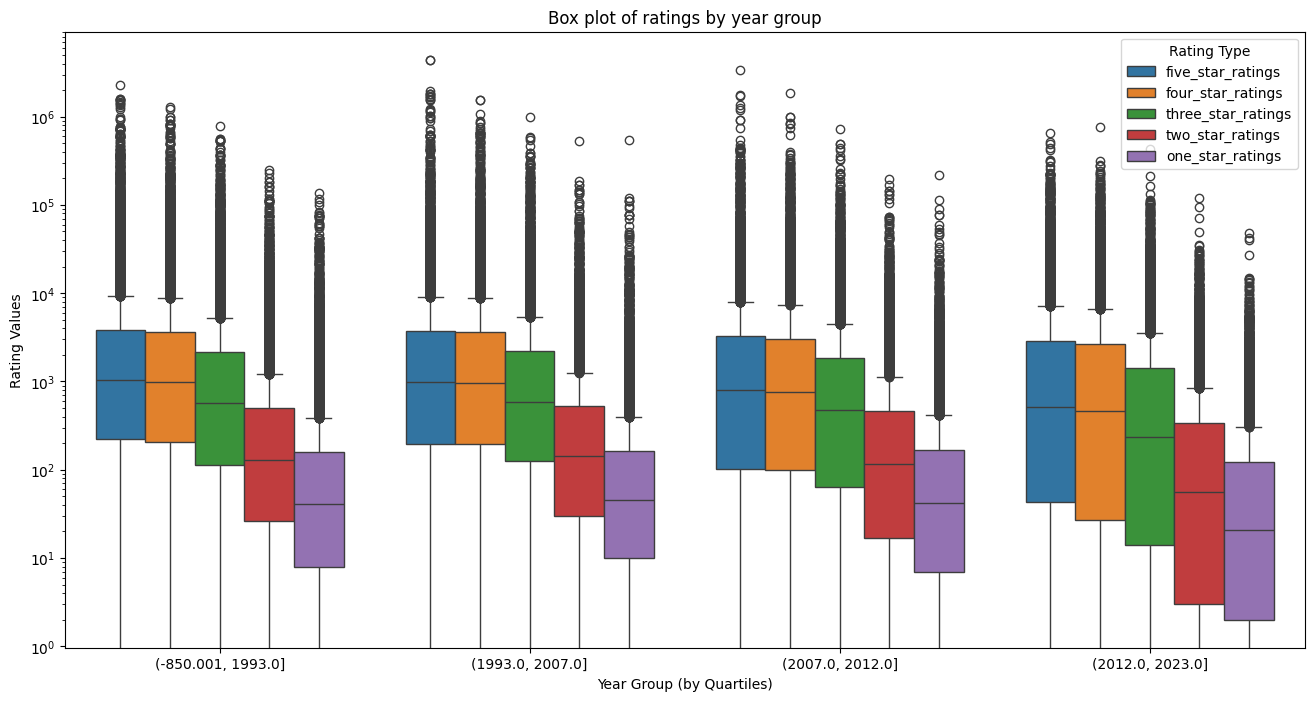

In [ ]:
# Réorganiser les données pour le boxplot
df_melted = pd.melt(df_year, id_vars='year_group',  # Utilise 'year_group' ici
                    value_vars=['five_star_ratings', 'four_star_ratings',
                                'three_star_ratings', 'two_star_ratings',
                                'one_star_ratings'],
                    var_name='rating', value_name='value')

# Créer le boxplot avec Seaborn
plt.figure(figsize=(16, 8))
sns.boxplot(x='year_group', y='value', hue='rating', data=df_melted)

# Ajouter un titre et des étiquettes
plt.title("Box plot of ratings by year group")
plt.xlabel('Year Group (by Quartiles)')  # Étiquette de l'axe des x
plt.ylabel('Rating Values')              # Étiquette de l'axe des y

plt.legend(title='Rating Type')          # Ajouter une légende
plt.yscale('log')                        # Utiliser une échelle logarithmique si nécessaire
plt.show()                               # Afficher le graphique

Empty DataFrame
Columns: [author_average_rating, author_gender, author_genres, author_id, author_name, author_rating_count, author_review_count, birthplace, book_average_rating, book_id, book_title, genre_1, genre_2, num_ratings, num_reviews, pages, publish_date, year_published]
Index: []
Empty DataFrame
Columns: [author_average_rating, author_gender, author_genres, author_id, author_name, author_rating_count, author_review_count, birthplace, book_average_rating, book_id, book_title, genre_1, genre_2, num_ratings, num_reviews, pages, publish_date, year_published]
Index: []


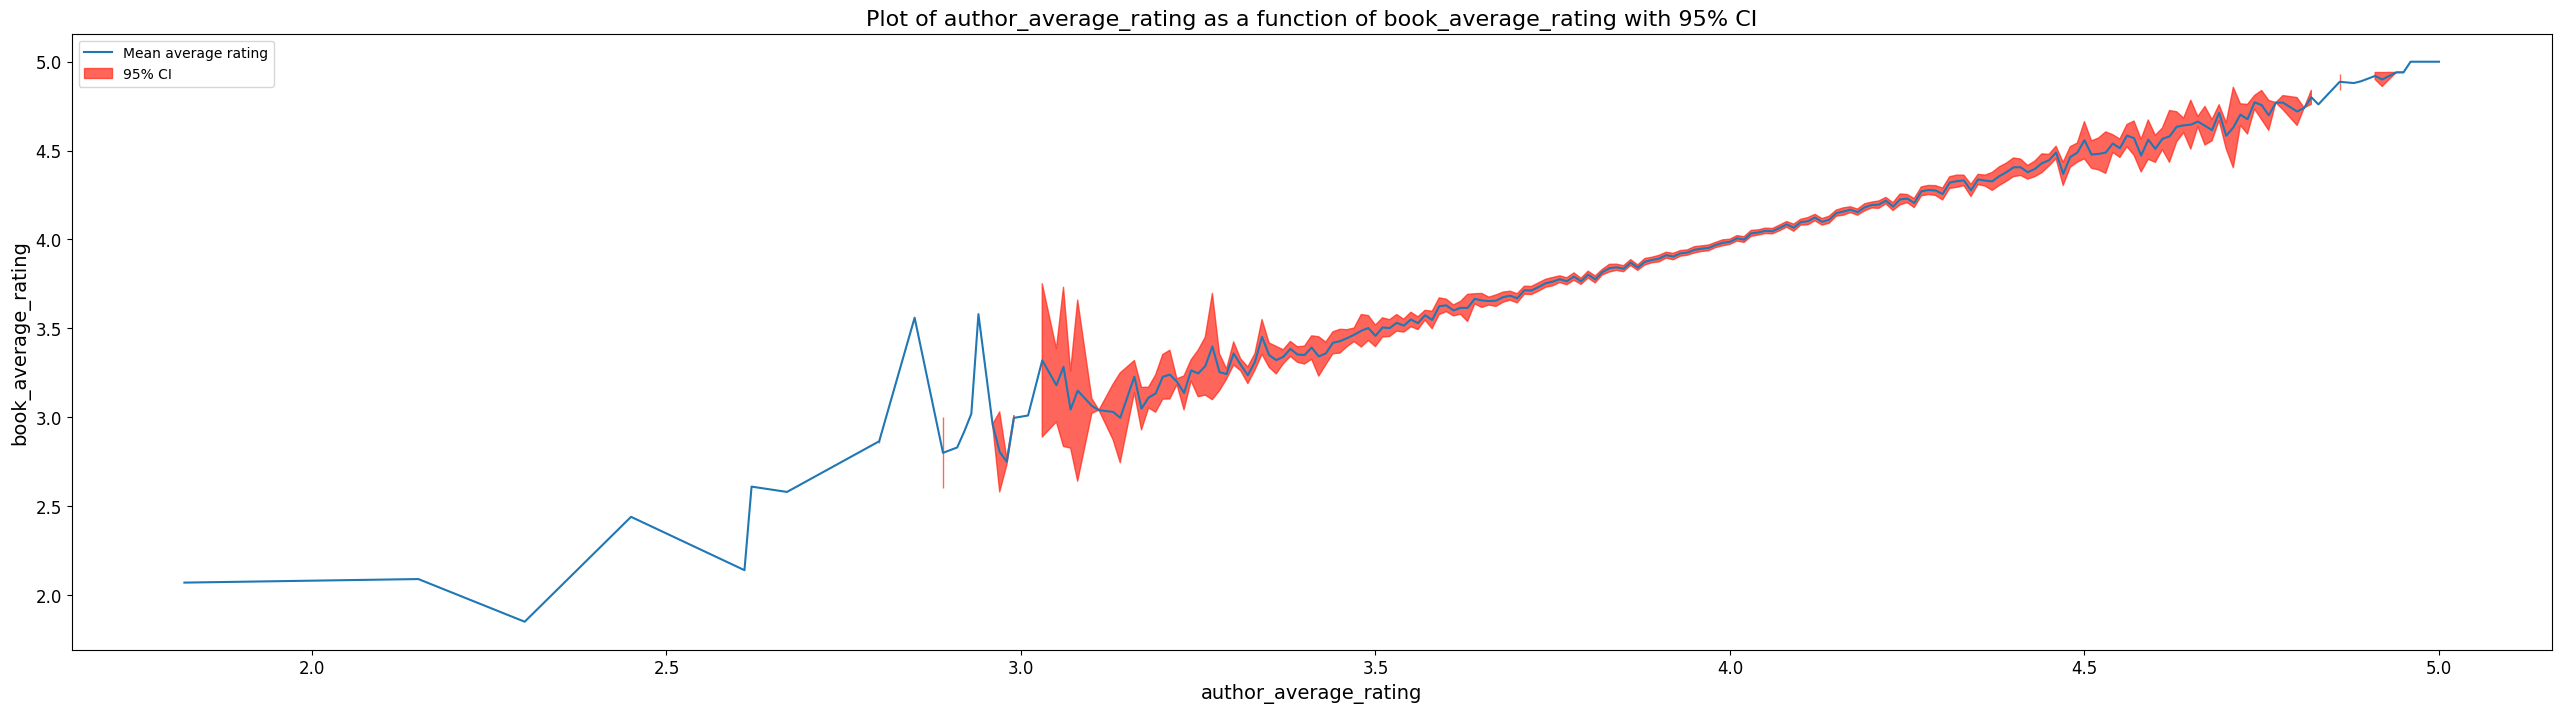

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remplacer les virgules par des points et convertir en valeurs numériques
df_author['author_average_rating'] = pd.to_numeric(df_author['author_average_rating'].str.replace(',', '.'), errors='coerce')
df_author['book_average_rating'] = pd.to_numeric(df_author['book_average_rating'].str.replace(',', '.'), errors='coerce')

# Vérifier qu'il ne reste pas de valeurs non converties
print(df_author[pd.to_numeric(df_author['author_average_rating'], errors='coerce').isna()])
print(df_author[pd.to_numeric(df_author['book_average_rating'], errors='coerce').isna()])

# Calcul de la moyenne et de l'écart type après conversion
df_mean = df_author.groupby('author_average_rating')['book_average_rating'].mean()
df_std = df_author.groupby('author_average_rating')['book_average_rating'].std()

# Taille de l'échantillon
n = df_author.groupby('author_average_rating')['book_average_rating'].count()

# Calcul de l'intervalle de confiance
ci = 1.96 * df_std / np.sqrt(n)

# Préparation des données pour le graphique
x = df_mean.index
y = df_mean.values

# Créer le graphique
plt.figure(figsize=(32, 8))  # Taille du plot

# Tracé de la moyenne et de l'intervalle de confiance
plt.plot(x, y, label='Mean average rating')
plt.fill_between(x, (y - ci), (y + ci), color='#ff2515', alpha=0.7, label='95% CI')

# Ajuster les labels des axes et le titre
plt.xlabel("author_average_rating", fontsize=14)
plt.ylabel("book_average_rating", fontsize=14)
plt.title("Plot of author_average_rating as a function of book_average_rating with 95% CI", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()
plt.show()
